In [ ]:
# 🚀 Python Exam Master Cheat Sheet
**Course:** Structured Programming / Scientific Computing

## 🚨 **The "Zero-Point" Checklist (Do not submit without checking these)**
1.  **Labels & Units:** "Graphs without labels (or units) are not worth any point".
    * *Always* use `plt.xlabel('Quantity [Unit]')` and `plt.ylabel('Quantity [Unit]')`.
2.  **Comments:** "Code-only submissions ... will only get half marks".
    * *Always* add a `#` comment explaining the physics of the line you just wrote.
3.  **Vectorization:** "Avoid loops wherever possible".
    * Use `np.sum(array)` instead of a loop.
4.  **Clear Variable Names:** Don't use `x`, `y`, `z` for everything. Use `time`, `velocity`, `mass`.

---

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit  # Weeks 3-4 (Curvefit.ipynb)
from scipy.integrate import odeint    # Weeks 8-9 (ODEs.ipynb)
import scipy.fft as fft               # Week X (FFT.ipynb) - CRITICAL NEW ADDITION
import pandas as pd                   # For reading CSVs
import scipy.signal as sc

# Try importing uncertainties (Week 5). 
# If this fails in the exam, you might need to install it or fall back to standard math.
try:
    from uncertainties import ufloat
    from uncertainties.umath import sin, cos, exp # Special math functions for errors
    print("Uncertainties library loaded.")
except ImportError:
    print("Uncertainties library NOT found. Use standard error propagation formula.")

# Graph Settings
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

Uncertainties library loaded.


# Part 1: The Basics (Weeks 1-2 & Revisions)

In [6]:
# --- 1. DEFINING FUNCTIONS ---
# "Functions.ipynb" taught return values and arguments.
def calculate_position(t, v0, a):
    """
    Calculates distance using s = v0*t + 0.5*a*t^2
    """
    s = v0 * t + 0.5 * a * t**2
    return s

# --- 2. LISTS VS ARRAYS ---
# Exam Trap: Lists [1,2] + [3,4] = [1,2,3,4]. Arrays [1,2] + [3,4] = [4,6].
# ALWAYS convert data to numpy arrays for math.
time_list = [0, 1, 2, 3, 4]
time_array = np.array(time_list)

# --- 3. VECTORIZATION (Avoiding Loops) ---
# "Revisions.ipynb" emphasizes speed.
# SLOW WAY:
dist_list = []
for t in time_list:
    dist_list.append(calculate_position(t, 10, 9.8))

# FAST WAY (Vectorized):
dist_array = calculate_position(time_array, 10, 9.8)

print("Position at t=2:", dist_array[2])

Position at t=2: 39.6


# Part 2: Plotting & Data (The "Free Marks")

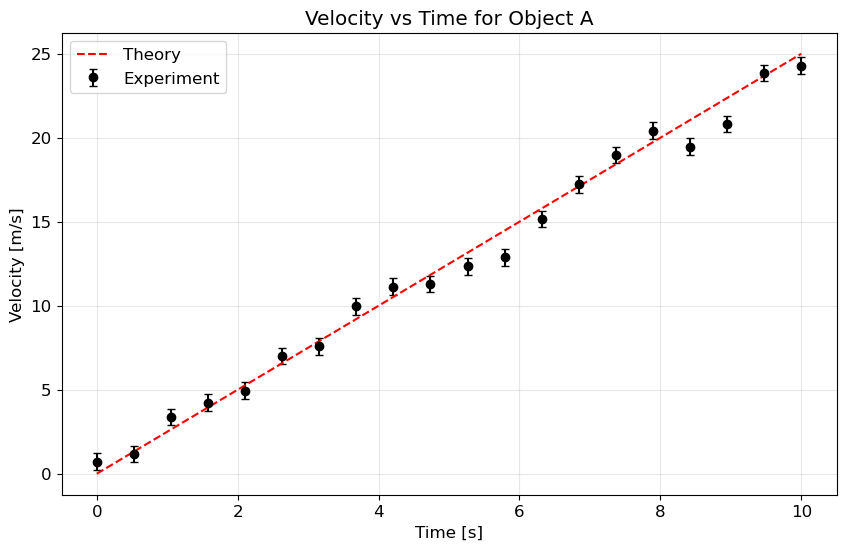

In [7]:
# Create Dummy Data
x = np.linspace(0, 10, 20)
y = 2.5 * x + np.random.normal(0, 1, 20)
y_err = 0.5 * np.ones_like(x)

plt.figure()

# 1. ERROR BARS are standard for experimental data (Assignment 1 & 3)
plt.errorbar(x, y, yerr=y_err, fmt='o', color='k', capsize=3, label='Experiment')

# 2. THEORY LINE (Plot smooth lines)
x_smooth = np.linspace(0, 10, 100)
plt.plot(x_smooth, 2.5 * x_smooth, 'r--', label='Theory')

# 3. LABELS (MANDATORY)
plt.xlabel('Time [s]')          # Unit in brackets
plt.ylabel('Velocity [m/s]')    # Unit in brackets
plt.title('Velocity vs Time for Object A')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Part 2.5: Importing Files (The "Make or Break" Step)

In [ ]:
# --- SCENARIO 1: The file is online (Assignment 1 method) ---
# If the exam gives you a URL, download it first using the command line tool !wget
# Note: The '!' works in Jupyter Notebooks to run shell commands.
# !wget https://raw.githubusercontent.com/PX2134/data/master/assignment1/pristine1.txt


# --- SCENARIO 2: Simple Text File (.txt) (Best for pure numbers) ---
# Common flags:
# skiprows=1 : Ignores the first line (headers)
# delimiter=',' : If numbers are separated by commas (default is whitespace)
# unpack=True : Splits columns into separate variables immediately

try:
    # Example: Loading the Assignment 1 style data
    # col1, col2 = np.loadtxt('pristine1.txt', skiprows=0, unpack=True)
    
    # If the file uses commas (like 1.0, 2.0):
    # x, y = np.loadtxt('data.txt', delimiter=',', skiprows=1, unpack=True)
    
    print("Numpy load successful.")
except Exception as e:
    print(f"Numpy load failed: {e}")


# --- SCENARIO 3: CSV File with Headers (Assignment 3 method) ---
# Pandas is much better if the file has headers like "Time, Velocity, Error"
try:
    # df stands for 'DataFrame'
    df = pd.read_csv('RV_Cygnus-X1.csv') 
    
    # Inspect the first few rows to check column names
    print("Columns found:", df.columns)
    print(df.head(3)) 
    
    # Convert to numpy arrays for plotting/math (Easier to work with)
    time_data = df['time'].to_numpy()  # Replace 'time' with actual column name
    vel_data  = df['rv'].to_numpy()    # Replace 'rv' with actual column name
    
    print("Pandas load successful.")
except Exception as e:
    print(f"Pandas load failed: {e}")


# --- SCENARIO 4: The "Emergency" Manual Way ---
# Use this ONLY if numpy/pandas fail or data is formatted weirdly.
data_x = []
data_y = []
try:
    with open('pristine1.txt', 'r') as f:
        for line in f:
            if line.startswith('#'): continue  # Skip comments
            parts = line.split()               # Split by whitespace
            if len(parts) >= 2:
                data_x.append(float(parts[0]))
                data_y.append(float(parts[1]))
    
    # Convert back to array
    data_x = np.array(data_x)
    data_y = np.array(data_y)
    print("Manual load successful.")
except Exception as e:
    print(f"Manual load failed: {e}")

# Part 3: Curve Fitting (Weeks 3-4)

In [8]:
# --- A. SIMPLE LINEAR/POLYNOMIAL FIT (Curvefit.ipynb) ---
# Use np.polyfit for straight lines (deg=1) or parabolas (deg=2)
# Returns coefficients: [slope, intercept] or [a, b, c]
coeffs = np.polyfit(x, y, deg=1) 
slope, intercept = coeffs
print(f"Linear Fit: y = {slope:.2f}x + {intercept:.2f}")


# --- B. COMPLEX NON-LINEAR FIT (Curvefit_2.ipynb / Assignment 3) ---
def sinusoidal(t, A, omega, phi, offset):
    return A * np.sin(omega * t + phi) + offset

# IMPORTANT: Always provide p0 (Initial Guesses) for trig functions!
# Guess A: (max-min)/2
# Guess Omega: 2*pi / Period
# Guess Offset: mean(y)
p0_guess = [10, 2*np.pi/5, 0, 5] 

# Try-Catch block helps if fit fails during exam
try:
    popt, pcov = curve_fit(sinusoidal, x, y, p0=p0_guess, sigma=y_err)
    perr = np.sqrt(np.diag(pcov)) # The errors on your parameters
    print(f"Amplitude: {popt[0]:.2f} +/- {perr[0]:.2f}")
except:
    print("Fit failed - check initial guesses (p0)!")

Linear Fit: y = 2.39x + 0.41
Amplitude: -4.19 +/- 2.32


# Part 4: Uncertainties (Week 5)

In [9]:
# If the exam asks to "calculate the uncertainty on the mass function"...
# "Uncertainties.ipynb" introduced the 'ufloat' object.

# 1. Define variables with errors: ufloat(value, uncertainty)
mass_1 = ufloat(10.5, 0.5)  # 10.5 +/- 0.5 kg
velocity = ufloat(20.0, 1.2) # 20.0 +/- 1.2 m/s

# 2. Do normal math - library handles error propagation!
kinetic_energy = 0.5 * mass_1 * velocity**2

# 3. Print result (format is Value +/- Error)
print(f"Kinetic Energy: {kinetic_energy:.2f} J")

# 4. Extract parts if needed for plotting
val = kinetic_energy.nominal_value
err = kinetic_energy.std_dev

Kinetic Energy: 2100.00+/-271.12 J


# Part 5: Fast Fourier Transforms (FFT) (Week X)

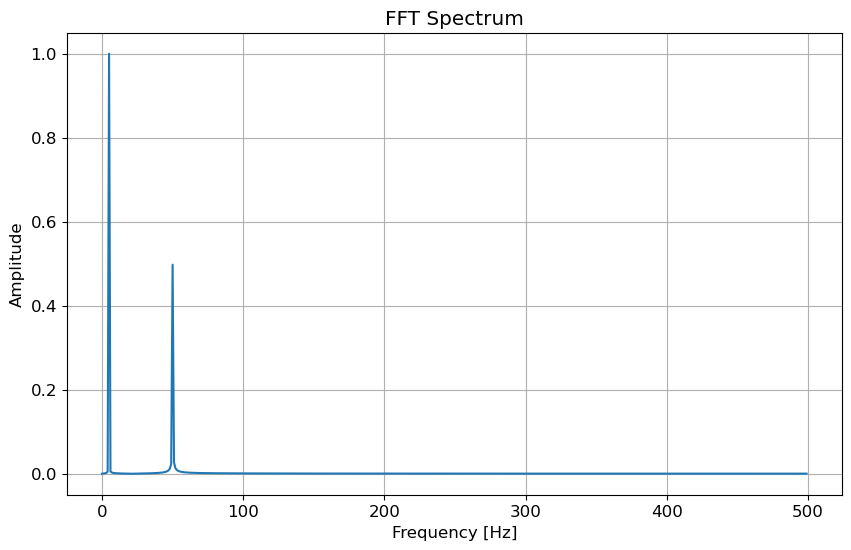

Dominant Frequency found at: 5.0 Hz


In [10]:
# Create a signal: 5 Hz sine wave + Noise
N = 1000               # Number of points
dt = 0.001             # Time step (Sample spacing)
t = np.linspace(0.0, N*dt, N)
signal = np.sin(2.0 * np.pi * 5.0 * t) + 0.5*np.sin(2.0 * np.pi * 50.0 * t)

# --- THE RECIPE ---
# 1. Compute FFT
yf = fft.fft(signal)

# 2. Compute Frequencies (x-axis)
xf = fft.fftfreq(N, dt)[:N//2] # Keep positive frequencies only

# 3. Compute Amplitude (y-axis)
# We take abs(yf) and usually normalize by 2/N to get physical amplitude
amplitude = 2.0/N * np.abs(yf[0:N//2])

plt.figure()
plt.plot(xf, amplitude)
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.title('FFT Spectrum')
plt.grid()
plt.show()

# Find dominant frequency
idx_max = np.argmax(amplitude)
print(f"Dominant Frequency found at: {xf[idx_max]} Hz")

# Part 6: Monte Carlo (Weeks 6-7)

MC Estimated Area: 77.52


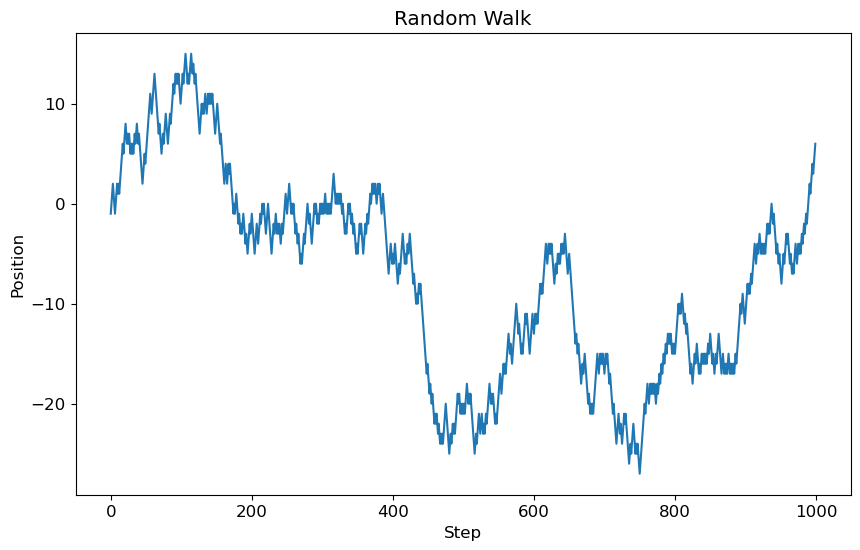

In [11]:
# --- A. MC INTEGRATION (Hit or Miss) ---
# Area of a shape defined by a condition
N_points = 5000
x_rand = np.random.uniform(0, 10, N_points)
y_rand = np.random.uniform(0, 10, N_points)

# Condition: e.g., Area under y = x^2
mask_under = y_rand < x_rand**2
fraction = np.sum(mask_under) / N_points
area_box = 10 * 10
area_est = area_box * fraction
print(f"MC Estimated Area: {area_est}")


# --- B. RANDOM WALKS (Random_walk.ipynb) ---
n_steps = 1000
# "Assignment 2" mentioned unequal probabilities (e.g., Wind blowing left)
# choice([-1, 1], p=[0.7, 0.3]) means 70% chance of -1, 30% chance of +1
steps = np.random.choice([-1, 1], size=n_steps, p=[0.5, 0.5]) 
path = np.cumsum(steps) # Position is cumulative sum of steps

plt.figure()
plt.plot(path)
plt.title('Random Walk')
plt.xlabel('Step')
plt.ylabel('Position')
plt.show()

# Part 7: ODEs (Weeks 8-9)

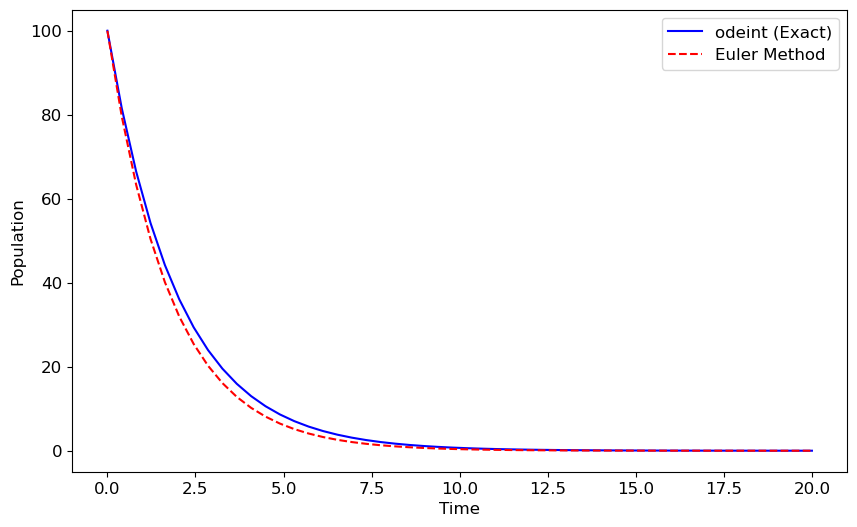

In [12]:
# Differential Equation: dy/dt = -k * y  (Radioactive Decay)

# --- METHOD 1: odeint (The Professional Way - Used in Assignment 4) ---
def decay_model(y, t, k):
    dydt = -k * y
    return dydt

y0 = 100  # Initial amount
t = np.linspace(0, 20, 50)
k = 0.5

# Solve
sol = odeint(decay_model, y0, t, args=(k,))

# --- METHOD 2: Euler's Method (The Loop Way) ---
# Sometimes exams ask you to write the loop manually.
dt = t[1] - t[0]
y_euler = [y0]
for i in range(len(t)-1):
    current_y = y_euler[-1]
    gradient = -k * current_y      # Evaluate dy/dt
    next_y = current_y + gradient * dt
    y_euler.append(next_y)

# Compare
plt.figure()
plt.plot(t, sol, 'b-', label='odeint (Exact)')
plt.plot(t, y_euler, 'r--', label='Euler Method')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Population')
plt.show()

# Cheat Sheet from assignments

# 📚 Section 1: Data Handling & Visualization

Used in: Assignment 1 (Raman), Assignment 3 (Radial Velocity)

## 1.1 Loading Data

The Logic: Computers can't read graphs; they need arrays of numbers. We usually read text (.txt) or CSV (.csv) files.

unpack=True: Flips the data so you can dump columns directly into variables (x, y, z) instead of rows.

delimiter=',': Tells Python values are separated by commas (common in CSVs). If separated by spaces, leave this out.

In [ ]:
import numpy as np

# Scenario A: Simple text file (space separated)
# "unpack=True" lets you assign columns to variables immediately
x, y = np.loadtxt('filename.txt', unpack=True)

# Scenario B: CSV file (comma separated)
# "skiprows=1" skips the header row if there is text at the top
time, velocity, error = np.loadtxt('filename.csv', delimiter=',', unpack=True, skiprows=1)

## 1.2 Plotting (The "Sanity Check")

he Logic: Always plot data before analyzing. It helps you guess initial parameters for fitting.

plt.plot: Connects dots (good for models).

plt.errorbar: Points with error bars (good for experimental data).

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6)) # Make the graph big enough to read

# Option A: Line plot (Theory/Models)
plt.plot(x, y, label='Model', color='red', linestyle='--')

# Option B: Scatter with Error Bars (Real Data)
# fmt='o' means plot dots, not lines. capsize adds little T's to error bars.
plt.errorbar(time, velocity, yerr=error, fmt='o', color='black', ecolor='gray', capsize=3, label='Data')

plt.xlabel('Time (units)')
plt.ylabel('Velocity (units)')
plt.legend() # Shows the labels
plt.show()

# 📉 Section 2: Curve Fitting & Modeling
Used in: Assignment 1 (Background removal, Gaussian fit), Assignment 3 (Sinusoidal fit)

## 2.1 Polynomial Fitting (Background Removal)

The Logic: Sometimes data sits on top of a curved "hill" (background noise). To remove it:

Mask the data: Ignore the peaks (signal) and keep only the flat/curved parts (noise).

Fit a polynomial to those noise parts.

Subtract that polynomial from the original data.

In [ ]:
# 1. Create a Mask (Select data WITHOUT signal)
# Example: Keep data where x < 2320 OR x > 2750 (ignoring the middle)
mask = (x < 2320) | (x > 2750) 
x_bg = x[mask]
y_bg = y[mask]

# 2. Fit the polynomial
# degree=3 means a cubic curve (ax^3 + bx^2 + cx + d)
coeffs = np.polyfit(x_bg, y_bg, 3) 
background_model = np.poly1d(coeffs) # Creates a function we can call

# 3. Subtract
y_corrected = y - background_model(x)

## 2.2 Non-Linear Fitting (curve_fit)

The Logic: You have a specific physics equation (Gaussian, Sine wave) and want to find the constants (Amplitude, Period, etc.) that match your data.

Define function: Python needs to know the math equation.

Initial Guess (p0): The computer is dumb; if you don't tell it roughly where the peak is, it will fail. Look at your plot to guess these numbers!

In [ ]:
from scipy.optimize import curve_fit

# Step 1: Define the model function
# Example: A Gaussian (Bell curve)
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# Example: A Sine wave (for orbits)
def sine_wave(t, K, P, gamma):
    return K * np.sin(2 * np.pi * t / P) + gamma

# Step 2: Provide Initial Guesses (LOOK AT YOUR PLOT)
# A=Height, mu=Position, sigma=Width
p0_guess = [100, 2500, 50] 

# Step 3: Run the fit
# sigma=y_error tells the code to trust points with small errors more
popt, pcov = curve_fit(gaussian, x_data, y_data, p0=p0_guess)

# Step 4: Extract results and errors
A_fit, mu_fit, sigma_fit = popt
# Errors are the square root of the diagonal of the covariance matrix
errors = np.sqrt(np.diag(pcov)) 

print(f"Mean: {mu_fit} +/- {errors[1]}")

# Step 5: Plot the result
plt.plot(x_data, gaussian(x_data, *popt), label='Best Fit')

# 🎲 Section 3: Monte Carlo Methods
Used in: Assignment 2 (Integration, Random Walks)

## 3.1 Monte Carlo Integration (Area & Mass)

The Logic: You have a weird shape defined by math boundaries (like a triangle). You want the Area or Mass.

Bounding Box: Draw a simple rectangle around the shape.

Random Points: Throw thousands of random darts at the box.

Count: How many darts landed inside the shape?

Math: Area=BoxArea * 
Hits/Total Darts


In [ ]:
# 1. Setup Bounding Box
N = 100000 # Number of darts
x_min, x_max = -2, 2
y_min, y_max = 0, 4
box_area = (x_max - x_min) * (y_max - y_min)

# 2. Generate Random Points
x_rand = np.random.uniform(x_min, x_max, N)
y_rand = np.random.uniform(y_min, y_max, N)

# 3. Check Condition (Is it inside the triangle?)
# Example: y < sqrt(3)*(x+2) AND y < -sqrt(3)*(x-2) ... (Geometry specific)
# This creates a list of True/False
is_inside = (y_rand < np.sqrt(3)*(x_rand + 2)) & (y_rand < -np.sqrt(3)*(x_rand - 2)) & (y_rand > 0)

# 4. Calculate Area
# np.sum(is_inside) counts the "True" values
area = box_area * np.sum(is_inside) / N

# 5. Calculate Mass (if density varies)
# Density formula given in question, e.g., rho = 1.28 * |sin(4.2*r)|
r = np.sqrt(x_rand**2 + y_rand**2) # Distance from center
rho = 1.28 * np.abs(np.sin(4.2 * r))

# Mass is the average density of points INSIDE * Area
mass = np.mean(rho[is_inside]) * area

## 3.2 Random Walks (2D)

The Logic: A particle takes N steps. Each step is random.

Cumulative Sum (cumsum): Instead of a loop adding steps one by one, generate all steps at once and sum them up. It's much faster.

axis=0: Sum down the rows (time). axis=1: Average across different walkers.

In [ ]:
n_steps = 1000
n_walkers = 500

# 1. Define possible moves
# Up, Down, Left, Right
dx_options = [0, 0, -1, 1]
dy_options = [1, -1, 0, 0]
# Probabilities (Biased: Left is only 10%)
probs = [0.3, 0.3, 0.1, 0.3] 

# 2. Generate choices for everyone at once
choices = np.random.choice([0, 1, 2, 3], size=(n_steps, n_walkers), p=probs)

# 3. Convert choices to coordinate changes
steps_x = np.array(dx_options)[choices] # Magically replaces 0,1,2,3 with actual dx
steps_y = np.array(dy_options)[choices]

# 4. Calculate Positions (Cumulative Sum)
# vstack adds a starting row of (0,0)
x_pos = np.vstack([np.zeros(n_walkers), np.cumsum(steps_x, axis=0)])
y_pos = np.vstack([np.zeros(n_walkers), np.cumsum(steps_y, axis=0)])

# 5. Analysis: Mean Squared Displacement
R2 = x_pos**2 + y_pos**2
mean_R2 = np.mean(R2, axis=1) # Average over all walkers

# ⚙️ Section 4: Differential Equations (ODEs)
Used in: Assignment 4 (Gravitational Waves)

## 4.1 Solving ODEs (odeint)

The Logic: You have rates of change ( 
dt
da
​	
 , 
dt
de
​	
 ). You want values (a,e) over time.

Define Derivative Function: A function that accepts state y and time t, and returns derivatives.

Pack State: y is a list, e.g., y[0] is distance a, y[1] is eccentricity e.

Integrate: odeint does the heavy lifting.

In [ ]:
from scipy.integrate import odeint

# 1. Define the Physics
def derivatives(y, t, m1, m2):
    a, e = y # Unpack current state
    
    # Safety: If binary merges (a becomes tiny), derivatives stop
    if a <= 0.0001: 
        return [0, 0]
    
    # The monstrous equations given in the exam paper
    # converting to da/dt and de/dt
    dadt = - (64/5) * (G**3 / c**5) * ... # (Formula provided in exam)
    dedt = - (304/15) * ...           # (Formula provided in exam)
    
    return [dadt, dedt]

# 2. Setup
t = np.linspace(0, 10e9 * 365*24*3600, 1000) # Time array in seconds
y0 = [0.2 * 1.5e11, 0.6] # Initial conditions [a0, e0] (in SI units!)
masses = (20 * 2e30, 20 * 2e30) # Masses in kg

# 3. Solve
solution = odeint(derivatives, y0, t, args=masses)

# 4. Extract results
a_sol = solution[:, 0]
e_sol = solution[:, 1]

## 4.2 Hybrid: ODEs + Random Kicks

The Logic: The system evolves smoothly (ODE), but every now and then gets kicked (Random Walk).

Loop: You cannot do this in one odeint shot. You must loop step-by-step.

Step: Integrate for a tiny time dt.

Kick: Change the final value of e using a random number generator.

Repeat.

In [ ]:
# Setup lists to store history
time_history = [0]
a_history = [a0]
e_history = [e0]

current_y = [a0, e0]
dt = 10 * 1e6 * 3.154e7 # 10 Myr in seconds

for i in range(1000): # Number of kicks
    # 1. Run ODE for just ONE step (dt)
    # create a small time array from 0 to dt
    t_mini = [0, dt] 
    sol = odeint(derivatives, current_y, t_mini, args=masses)
    
    # Get the values at the end of the step
    a_new, e_new = sol[-1]
    
    # 2. Apply Random Kick
    # Example: Kick e by random amount between -0.1 and 0.1
    kick = np.random.uniform(-0.1, 0.1) * (a_new/a0)**1.5
    e_new += kick
    
    # 3. Fix Physics (e cannot be < 0 or >= 1)
    if e_new < 0: e_new = 0
    if e_new >= 1: e_new = 0.99
        
    # 4. Save and Update
    a_history.append(a_new)
    e_history.append(e_new)
    time_history.append(time_history[-1] + dt)
    current_y = [a_new, e_new]
    
    # Stop if merged
    if a_new < 0.001: break

# ⚡ Section 5: Uncertainties
Used in: Assignment 3

The Logic: Stop calculating errors by hand (partial derivatives). Use the uncertainties package. It tracks errors automatically through math operations.

In [11]:
from uncertainties import ufloat
import uncertainties.umath as umath # Use this for sin, cos, log, etc.

# 1. Define numbers with errors (Value +/- Error)
M1 = ufloat(40, 10) # 40 +/- 10
i_deg = ufloat(45, 15)

# 2. Convert units if needed (keep error attached!)
i_rad = i_deg * np.pi / 180

# 3. Do Math (errors propagate automatically)
# Example: Mass function f = P * K^3 / (2*pi*G)
# Assume P and K are ufloats from your curve_fit results
f_mass = P_fit * K_fit**3 / (2 * np.pi * 6.67e-11)

# 4. Print results
print(f"Mass function is: {f_mass:.2e}") 
# Output will look like: 1.23e+30 +/- 0.45e+30

NameError: name 'np' is not defined